In [ ]:
import zipfile
with zipfile.ZipFile("dataset_cleaned.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset_cleaned_extracted")

In [1]:
import pandas as pd
valid = pd.read_csv("dataset_cleaned_extracted/valid.csv")

x_columns = ['Male', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'RemovedTeeth',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
y_column = 'HadHeartAttack'

valid_x = valid[x_columns]
valid_y = valid[y_column]

In [2]:
from tensorflow import keras
model = keras.models.load_model('model_v1.keras')

In [3]:
import numpy as np
predictions = model.predict(valid_x)[:,0]
true_answers = valid_y.to_numpy()
validation_accuracy = np.sum(np.rint(predictions) == true_answers)/len(true_answers)
print(f"Poprawność na zbiorze walidacyjnym: {validation_accuracy:.2%}")

1392/1392 [==============================] - 1s 645us/step
Poprawność na zbiorze walidacyjnym: 86.15%


In [4]:
print(predictions[:100])

[0.08692811 0.12067404 0.31880796 0.64843357 0.15188715 0.06517262
 0.03407578 0.49311596 0.00781232 0.2089161  0.46056542 0.45341685
 0.4294767  0.25619727 0.20345858 0.2302334  0.38631877 0.36519188
 0.04014764 0.23888215 0.27519897 0.08928084 0.05204074 0.42043713
 0.19055638 0.29787344 0.23068897 0.88435644 0.03139259 0.95048493
 0.2457671  0.5858893  0.02678488 0.06240147 0.52132165 0.01431455
 0.02444405 0.07804424 0.11274771 0.12714393 0.35450152 0.01294624
 0.190797   0.07512036 0.48486376 0.06140704 0.9019506  0.08810509
 0.61831665 0.15642735 0.03310075 0.04532438 0.10763614 0.4277772
 0.20325996 0.8980398  0.7491019  0.38502344 0.03970775 0.0401529
 0.03046079 0.10123587 0.04993626 0.05702    0.18049946 0.1223311
 0.731555   0.40104443 0.18443953 0.1265702  0.07467585 0.03895461
 0.35271063 0.38039213 0.4450048  0.03670818 0.05534125 0.91664517
 0.413391   0.12545326 0.11306539 0.4350903  0.48778924 0.40804324
 0.33885244 0.21948677 0.01242744 0.02531701 0.6693964  0.1539347

In [5]:
print(np.rint(predictions)[:100])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [6]:
print(true_answers[:100])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [7]:
np.savetxt("predictions.txt",predictions)

In [8]:
np.savetxt("predictions_two_digits.txt",predictions, fmt='%1.2f')

In [9]:
validate_heart_disease_true = valid.loc[valid[y_column]==1]
validate_heart_disease_true.head()

Unnamed: 0         State  Male  GeneralHealth  PhysicalHealthDays  \
7       135450      Kentucky   1.0           0.50                 0.0   
25      321301  Rhode Island   1.0           0.00                 1.0   
29      402512    Washington   1.0           0.25                 0.0   
44      128060        Kansas   1.0           0.50                 0.0   
69      130420        Kansas   1.0           0.75                 0.0   

    MentalHealthDays                                    LastCheckupTime  \
7                0.0  Within past year (anytime less than 12 months ...   
25               1.0  Within past year (anytime less than 12 months ...   
29               0.1  Within past year (anytime less than 12 months ...   
44               0.0  Within past year (anytime less than 12 months ...   
69               0.0                                5 or more years ago   

    PhysicalActivities  SleepHours  RemovedTeeth  ...  HeightInMeters  \
7                  1.0    0.260870      1.000000  ...        0.613793   
25                 1.0    0.260870      0.000000  ...        0.634483   
29                 1.0    0.347826      0.333333  ...        0.510345   
44                 0.0    0.260870      0.333333  ...        0.455172   
69                 1.0    0.217391      0.333333  ...        0.544828   

    WeightInKilograms       BMI  AlcoholDrinkers  HIVTesting  FluVaxLast12  \
7            0.164353  0.095584              1.0         0.0           0.0   
25           0.193760  0.116415              1.0         0.0           0.0   
29           0.380616  0.389716              1.0         0.0           1.0   
44           0.084789  0.203190              1.0         0.0           1.0   
69           0.190289  0.153196              1.0         0.0           0.0   

    PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  CovidPos  
7             0.0                0.0               0.0       0.0  
25            0.0                0.0               0.0       0.0  
29            1.0                0.0               1.0       0.0  
44            1.0                0.0               0.0       0.0  
69            0.0                0.0               0.0       0.0  

[5 rows x 41 columns]

In [10]:
validate_heart_disease_true_x = validate_heart_disease_true[x_columns]
predictions = model.predict(validate_heart_disease_true_x)[:,0]
predictions

78/78 [==============================] - 0s 490us/step


array([0.49311596, 0.29787344, 0.95048493, ..., 0.5605181 , 0.08343226,
       0.4648933 ], dtype=float32)

### Z osób które miały choroby serca w zbiorze walidacyjnym 70% zostało poprawnie zaklasyfikowanych jako 1, pomimo iż klasa ta stanowi bardzo mały odsetek całego zbioru

In [11]:
np.sum(np.rint(predictions) == np.ones_like(predictions))/len(predictions)

0.701733172108021

<AxesSubplot:ylabel='count'>

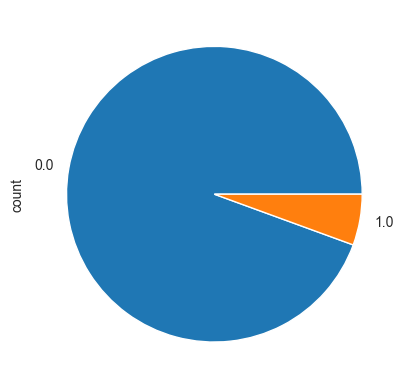

In [15]:
valid[y_column].value_counts().plot(kind="pie")